# Exact solution of 2D Ising model
References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

## Problem-1

Plot $\ln Z$, $\frac{E}{mn}$, $\frac{C}{mn}$ as a function of temperature $T$ for $m=n=2, 4, 8$, etc. What is the largest size you can reach without overflow?

![Alt text](FSS.png)

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[4-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh(2K)^2}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

In [3]:
def c_0(K):
    return np.sinh(2*K) + 1/np.sinh(2*K) - 1

def e_c(n, K):
    c = np.zeros((2*n, K.size))
    for r in range(2*n):
        c[r, :] = np.sinh(2*K) + 1/np.sinh(2*K) - np.cos(np.pi*r/n)
    return c

def e_d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def e_dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))



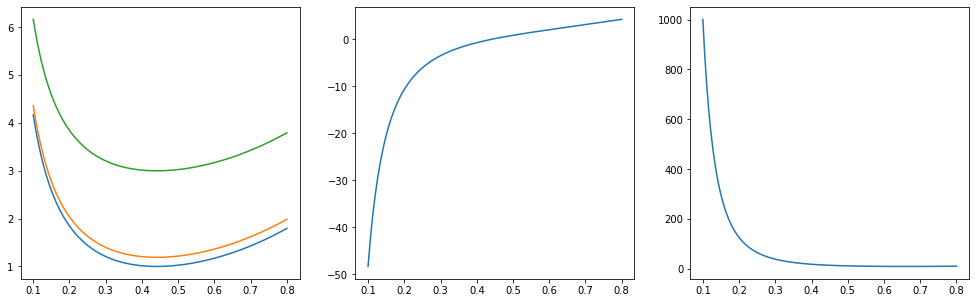

In [4]:
K = np.linspace(0.1, 0.8, 1000)

plt.figure(figsize=(17, 5))

n = 5
m = n

c0 = c_0(K)
c = e_c(n, K)
d_c = e_d_c(K)
dd_c = e_dd_c(K)

plt.subplot(131)

pylab.plot(K, c0)
pylab.plot(K, c[1])
pylab.plot(K, c[5])

plt.subplot(132)
pylab.plot(K, d_c) 

plt.subplot(133)
pylab.plot(K, dd_c) 
pylab.show()

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), l \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.

The first deratives of $\gamma_r$ are:
$$ 
  \gamma^\prime_0 = 2 + \frac{1}{\tanh(K)} \frac{1}{\cosh^2(K)}
  = 2 + \frac{2}{\sinh(2K)}
  = 2 (1 + \frac{1}{\sinh(2K)}).
$$

$$
  \gamma^\prime_r = \frac{c^\prime_r}{\sqrt{c^2_r-1}} = c^\prime (c^2_r-1)^{-1/2}.
$$

The second deratives of $\gamma_r$ are:

$$
  \gamma_0^{\prime\prime} 
  = -4 \csch(2K) \coth(2K)
  = -4 \frac{\cosh{2K}}{\sinh(2K)^2}.
$$

$$
  \gamma_r^{\prime\prime} = \frac{c_r^{\prime\prime}}{\sqrt{c^2-1}} - \frac{ (c^\prime_r)^2 c_r }{ (c^2_r-1)^{3/2} }
  = c^{\prime\prime} (c^2_r-1)^{-1/2} - (c^\prime)^2 c_r (c^2_r-1)^{-3/2}
$$

In [5]:
def e_gamma(n, K):
    c = e_c(n, K)
    
    gamma = np.zeros((2*n, K.size))
    
    gamma[0, :] = 2*K + np.log(np.tanh(K))
    gamma[1:, :] = np.arccosh(c[1:, :])
    
          
    return gamma

def e_d_gamma(n, K):
    c = e_c(n, K)
    d_c = e_d_c(K)
       
    d_gamma = np.zeros((2*n, K.size))
    
    d_gamma[0, :] = 2*(1+(np.sinh(2*K)**(-1)))
    d_gamma[1:, :] = d_c[:] * (c[1:, :]**2-1)**(-1/2) -c[1:, :]*(d_c[:]**2) * (c[1:,:]**2-1)**(-3/2)
    
    return d_gamma

def e_dd_gamma(n, K):
    c = e_c(n, K)
    d_c = e_d_c(K)
    dd_c = e_dd_c(K)
    
    dd_gamma = np.zeros((2*n, K.size))
    
    dd_gamma[0, :] = -4*np.cosh(2*K)/(np.sinh(2*K)**2)
    dd_gamma[1:, :] = dd_c[:] * (c[1:, :]**2-1)**(-1/2)
    
    return dd_gamma


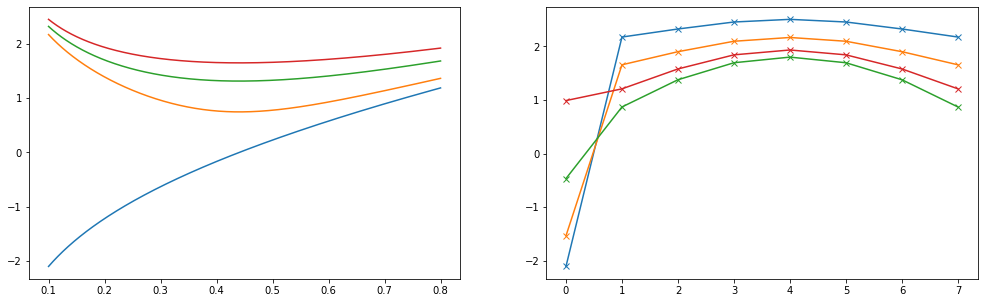

In [6]:
K = np.linspace(0.1, 0.8, 600)

plt.figure(figsize=(17, 5))

n = 4
m = n

gamma = e_gamma(n, K)

plt.subplot(121)

for i in range(n):
    pylab.plot(K, gamma[i])
    
plt.subplot(122)

pylab.plot(range(2*n), gamma[0:2*n, 0],'x-',label= 'Z1')
pylab.plot(range(2*n), gamma[0:2*n, 50],'x-')
pylab.plot(range(2*n), gamma[0:2*n, 200], 'x-')
pylab.plot(range(2*n), gamma[0:2*n, 540], 'x-')

### $Z_1, Z_2, Z_3, Z_4$
The canonical partition function reads:
$$
  Z(K) = \frac{1}{2} \left(2\sinh(2K)\right)^{mn/2} \left(Z_1(K) + Z_2(K) + Z_3(K) + Z_4(K)\right),
$$
where
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r1}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r1}). $$

Note that $Z_4$ changes sign at critical point. $Z_1, Z_2, Z_3$ are alwayas positive. 

In [7]:
def e_Z1(m, gamma):
    return np.prod(2*np.cosh(m*gamma[1::2,:]/2), axis=0)

def e_Z2(m, gamma):
    return np.prod(2*np.sinh(m*gamma[1::2,:]/2), axis=0)

def e_Z3(m, gamma):
    return np.prod(2*np.cosh(m*gamma[0::2,:]/2), axis=0)

def e_Z4(m, gamma):
    return np.prod(2*np.sinh(m*gamma[0::2,:]/2), axis=0)

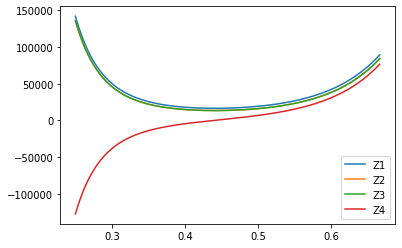

In [8]:
T = np.linspace(1.5, 4,1000)
K = 1/T

n = 4
m = n

gamma = e_gamma(n, K)

Z1 = e_Z1(m,gamma)
Z2 = e_Z2(m,gamma)
Z3 = e_Z3(m,gamma)
Z4 = e_Z4(m,gamma)

pylab.plot(K, Z1,label = 'Z1')
pylab.plot(K, Z2, label = 'Z2')
pylab.plot(K, Z3, label = 'Z3')
pylab.plot(K, Z4, label = 'Z4')
pylab.legend(loc='lower right')

### $\log(Z)$
The log of the partition function reads:
$$
  \ln Z=  \ln( \frac{1}{2} ) + \frac{mn}{2} \ln( 2\sinh(2K) ) + \ln\left(Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)\right),
$$
or the log of the partition function per site
$$
  \frac{\ln Z}{mn} = \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) 
  + \frac{1}{mn} \ln(Z_1(K))
  + \frac{1}{mn} \ln\left[ 1+ \frac{Z_2(K)}{Z_1(K)}+\frac{Z_3(K)}{Z_1(K)}+\frac{Z_4(K)}{Z_1(K)} \right].
$$

In [11]:
def e_lnZ1(K, n, m, gamma):
    lnZ1 = 0.0
    for r in range(n):
        lnZ1 = lnZ1 + np.log(2*np.sinh(m*gamma[2*r+1]/2))
    return lnZ1

def e_Z2_over_Z1(m, gamma, K): 
    return np.sum((np.sinh(m*gamma[1::2,:]/2) / np.cosh(m*gamma[1::2,:]/2)))

def e_Z3_over_Z1(m, gamma, K):
    return np.sum((np.cosh(m*gamma[0::2,:]/2) / np.cosh(m*gamma[1::2,:]/2)))

def e_Z4_over_Z1(m, gamma, K):
    return np.sum((np.sinh(m*gamma[0::2,:]/2) / np.cosh(m*gamma[1::2,:]/2)))

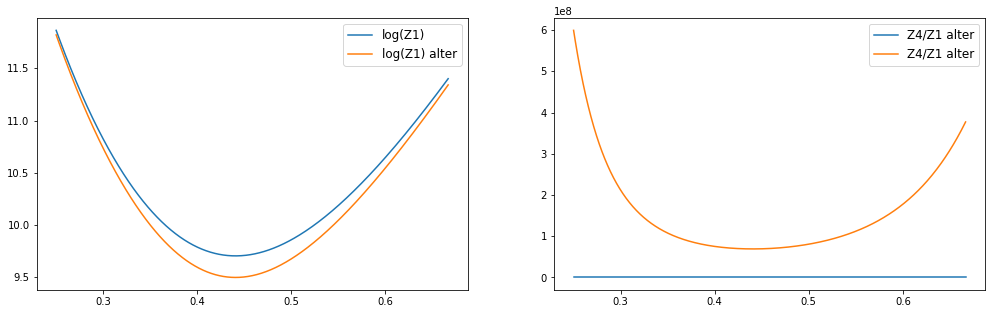

In [12]:
T = np.linspace(1.5, 4,1000)
K = 1/T

plt.figure(figsize=(17, 5))

n = 4
m = n

gamma = e_gamma(n, K)



lnZ1 = e_lnZ1(K, n, m, gamma)
Z2_over_Z1 = e_Z2_over_Z1(m, gamma, K)
Z3_over_Z1 = e_Z3_over_Z1(m, gamma, K)
Z4_over_Z1 = e_Z4_over_Z1(m, gamma, K)

plt.subplot(121)

pylab.plot(K, np.log(Z1), label='log(Z1)')
pylab.plot(K, lnZ1, label='log(Z1) alter')
pylab.legend(fontsize=12)

# plt.subplot(152)

# pylab.plot(K, Z2/Z1, label='Z2')
# pylab.plot(K, Z2_over_Z1, label='Z2/Z1 alter')
# pylab.legend(fontsize=12)

# plt.subplot(153)

# pylab.plot(K, Z3/Z1, label='Z3')
# pylab.plot(K, Z3_over_Z1, label='Z3/Z1 alter')
# pylab.legend(fontsize=12)

# plt.subplot(154)

# pylab.plot(K, Z4/Z1, label='Z4')
# pylab.plot(K, Z4_over_Z1, label='Z4/Z1 alter')
# pylab.legend(fontsize=12)

plt.subplot(122)

pylab.plot(K, Z4_over_Z1-Z4/Z1, label='Z4/Z1 alter')
pylab.plot(K, Z4_over_Z1*Z1-Z4, label='Z4/Z1 alter')
pylab.legend(fontsize=12)




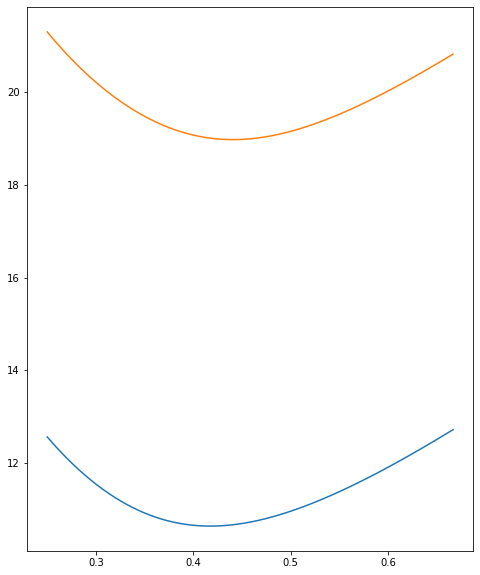

In [16]:
T = np.linspace(1.5, 4,1000)
K = 1/T

plt.figure(figsize=(8, 10))

n = 4
m = n

gamma = e_gamma(n, K)

Z1 = e_Z1(m,gamma)
Z2 = e_Z2(m,gamma)
Z3 = e_Z3(m,gamma)
Z4 = e_Z4(m,gamma)

lnZ1 = e_lnZ1(K, n, m, gamma)
Z2_over_Z1 = e_Z2_over_Z1(m, gamma, K)
Z3_over_Z1 = e_Z3_over_Z1(m, gamma, K)
Z4_over_Z1 = e_Z4_over_Z1(m, gamma, K)


lnZ = np.log(Z1+Z2+Z3+Z4)
lnZ_alter = lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)
pylab.plot(K, lnZ1)
pylab.plot(K, lnZ_alter)

### $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$

$$ 
  \frac{Z^\prime_1}{Z_1} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right), \;
  \frac{Z^\prime_2}{Z_2} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right).
$$

$$
  \frac{Z^\prime_3}{Z_3} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right), \;
  \frac{Z^\prime_4}{Z_4} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right).
$$

In [21]:
def e_dZ1_over_Z1(m,gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def e_dZ2_over_Z2(m,gamma, d_gamma, K):
    return np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2

def e_dZ3_over_Z3(m,gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

def e_dZ4_over_Z4(m,gamma, d_gamma, K):
    return np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2

In [22]:
T = np.linspace(1.5, 4,1000)
K = 1/T

plt.figure(figsize=(12, 4))

n = 4
m = n

gamma = e_gamma(n, K)

Z1 = e_Z1(m,gamma)
Z2 = e_Z2(m,gamma)
Z3 = e_Z3(m,gamma)
Z4 = e_Z4(m,gamma)

lnZ1 = e_lnZ1(K, n, m, gamma)
Z2_over_Z1 = e_Z2_over_Z1(m, gamma, K)
Z3_over_Z1 = e_Z3_over_Z1(m, gamma, K)
Z4_over_Z1 = e_Z4_over_Z1(m, gamma, K)

dZ1 = np.gradient(Z1,K)
dZ2 = np.gradient(Z2,K)
dZ3 = np.gradient(Z3,K)
dZ4 = np.gradient(Z4,K)

d_gamma = e_d_gamma(n, K)
dZ1_over_Z1 =e_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 =e_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 =e_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 =e_dZ4_over_Z4(m,gamma,d_gamma,K)

#dZ1/Z1

# plt.subplot(141)
# pylab.plot(K, dZ1/Z1, label = r'$\frac{Z^\prime_1}{Z_1}$')
# pylab.plot(K, dZ1_over_Z1, label = r'$\frac{Z^\prime_}{Z_1}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], dZ1[1:-1]/Z1[1:-1]-dZ1_over_Z1[1:-1], label=r'$\frac{Z^\prime_1}{Z_1}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, dZ1, label=r'$Z^\prime_1$')
# pylab.plot(K, dZ1_over_Z1*Z1, label = r'$Z^\prime_1$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], dZ1[1:-1]-dZ1_over_Z1[1:-1]*Z1[1:-1], label=r'$Z^\prime_1$ diff') 
# pylab.legend(fontsize=12)

<Figure size 864x288 with 0 Axes>

In [23]:
#dZ2/Z2


# plt.figure(figsize=(12,4))

# plt.subplot(141)
# pylab.plot(K, dZ2/Z2, label = r'$\frac{Z^\prime_2}{Z_2}$')
# pylab.plot(K, dZ2_over_Z2, label = r'$\frac{Z^\prime_}{Z_2}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], dZ2[1:-1]/Z2[1:-1]-dZ2_over_Z2[1:-1], label=r'$\frac{Z^\prime_2}{Z_2}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, dZ2, label=r'$Z^\prime_2$')
# pylab.plot(K, dZ2_over_Z2*Z2, label = r'$Z^\prime_2$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], dZ2[1:-1]-dZ2_over_Z2[1:-1]*Z2[1:-1], label=r'$Z^\prime_2$ diff') 
# pylab.legend(fontsize=12)


In [24]:
#dZ3/Z3


# plt.figure(figsize=(12, 4))

# plt.subplot(141)
# pylab.plot(K, dZ3/Z3, label = r'$\frac{Z^\prime_3}{Z_3}$')
# pylab.plot(K, dZ3_over_Z3, label = r'$\frac{Z^\prime_}{Z_3}$')

# plt.subplot(142)
# pylab.plot(K[1:-1], dZ3[1:-1]/Z3[1:-1]-dZ3_over_Z3[1:-1], label=r'$\frac{Z^\prime_3}{Z_3}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, dZ3, label=r'$Z^\prime_3$')
# pylab.plot(K, dZ3_over_Z3*Z3, label = r'$Z^\prime_3$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], dZ3[1:-1]-dZ3_over_Z3[1:-1]*Z3[1:-1], label=r'$Z^\prime_3$ diff') 
# pylab.legend(fontsize=12)

In [25]:
#dZ4/Z4


# plt.figure(figsize=(12, 4))

# plt.subplot(141)
# pylab.plot(K, dZ4/Z4, label = r'$\frac{Z^\prime_4}{Z_4}$')
# pylab.plot(K, dZ4_over_Z4, label = r'$\frac{Z^\prime_}{Z_4}$')

# plt.subplot(142)
# pylab.plot(K[1:-1], dZ4[1:-1]/Z4[1:-1]-dZ4_over_Z4[1:-1], label=r'$\frac{Z^\prime_4}{Z_4}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, dZ4, label=r'$Z^\prime_4$')
# pylab.plot(K, dZ4_over_Z4*Z4, label = r'$Z^\prime_4$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], dZ4[1:-1]-dZ4_over_Z4[1:-1]*Z4[1:-1], label=r'$Z^\prime_4$ diff') 
# pylab.legend(fontsize=12)

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$

$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right].
$$

In [26]:
def e_ddZ1_over_Z1(m,gamma, d_gamma, dd_gamma, K):
    ddZ1_over_Z1 = (np.sum(d_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2), axis=0)*m/2)**2
    ddZ1_over_Z1 = ddZ1_over_Z1 + np.sum(dd_gamma[1::2,:]*np.tanh(m*gamma[1::2,:]/2)+((d_gamma[1::2,:]/np.cosh(m*gamma[1::2,:]/2))**2)*m/2)
    
    return ddZ1_over_Z1

def e_ddZ2_over_Z2(m,gamma, d_gamma, dd_gamma, K):
    ddZ2_over_Z2 = (np.sum(d_gamma[1::2,:]* (np.tanh(m*gamma[1::2,:]/2))**(-1) , axis=0)*m/2)**2
    ddZ2_over_Z2 = ddZ2_over_Z2 + np.sum(dd_gamma[1::2,:]*(np.tanh(m*gamma[1::2,:]/2))**(-1) + ((d_gamma[1::2,:]/np.sinh(m*gamma[1::2,:]/2))**2)*m/2)
    
    return ddZ2_over_Z2

def e_ddZ3_over_Z3(m,gamma, d_gamma, dd_gamma, K):
    ddZ3_over_Z3 = (np.sum(d_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2), axis=0)*m/2)**2
    ddZ3_over_Z3 = ddZ3_over_Z3 + np.sum(dd_gamma[0::2,:]*np.tanh(m*gamma[0::2,:]/2)+((d_gamma[0::2,:]/np.cosh(m*gamma[0::2,:]/2))**2)*m/2)
    
    return ddZ3_over_Z3

def e_ddZ4_over_Z4(m,gamma, d_gamma, dd_gamma, K):
    ddZ4_over_Z4 = (np.sum(d_gamma[0::2,:]* (np.tanh(m*gamma[0::2,:]/2))**(-1) , axis=0)*m/2)**2
    ddZ4_over_Z4 = ddZ4_over_Z4 + np.sum(dd_gamma[0::2,:] * (np.tanh(m*gamma[0::2,:]/2))**(-1) + ((d_gamma[0::2,:]/np.sinh(m*gamma[0::2,:]/2))**2)*m/2)
    
    return ddZ4_over_Z4

In [27]:
T = np.linspace(1.5, 4,10000)
K = 1/T

plt.figure(figsize=(12, 4))

n = 4
m = n

gamma = e_gamma(n, K)

Z1 = e_Z1(m,gamma)
Z2 = e_Z2(m,gamma)
Z3 = e_Z3(m,gamma)
Z4 = e_Z4(m,gamma)

dZ1 = np.gradient(Z1,K)
dZ2 = np.gradient(Z2,K)
dZ3 = np.gradient(Z3,K)
dZ4 = np.gradient(Z4,K)

ddZ1 = np.gradient(dZ1,K)
ddZ2 = np.gradient(dZ2,K)
ddZ3 = np.gradient(dZ3,K)
ddZ4 = np.gradient(dZ4,K)

d_gamma = e_d_gamma(n, K)
dZ1_over_Z1 =e_dZ1_over_Z1(m,gamma,d_gamma,K)
dZ2_over_Z2 =e_dZ2_over_Z2(m,gamma,d_gamma,K)
dZ3_over_Z3 =e_dZ3_over_Z3(m,gamma,d_gamma,K)
dZ4_over_Z4 =e_dZ4_over_Z4(m,gamma,d_gamma,K)

dd_gamma = e_dd_gamma(n, K)
ddZ1_over_Z1 =e_ddZ1_over_Z1(m,gamma,d_gamma,dd_gamma, K)
ddZ2_over_Z2 =e_ddZ2_over_Z2(m,gamma,d_gamma,dd_gamma, K)
ddZ3_over_Z3 =e_ddZ3_over_Z3(m,gamma,d_gamma,dd_gamma, K)
ddZ4_over_Z4 =e_ddZ4_over_Z4(m,gamma,d_gamma,dd_gamma, K)

#ddZ1/Z1

# plt.subplot(141)
# pylab.plot(K, ddZ1/Z1, label = r'$\frac{Z^\prime_2}{Z_1}$')
# pylab.plot(K, ddZ1_over_Z1, label = r'$\frac{Z^\prime_}{Z_1}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], ddZ1[1:-1]/Z1[1:-1]-ddZ1_over_Z1[1:-1], label=r'$\frac{Z^\prime_1}{Z_1}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, ddZ1, label=r'$Z^\prime_1$')
# pylab.plot(K, ddZ1_over_Z1*Z1, label = r'$Z^\prime_1$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], ddZ1[1:-1]-ddZ1_over_Z1[1:-1]*Z1[1:-1], label=r'$Z^\prime_1$ diff') 
# pylab.legend(fontsize=12)

<Figure size 864x288 with 0 Axes>

In [29]:
#ddZ2/Z2

# plt.figure(figsize=(12, 4))

# plt.subplot(141)
# pylab.plot(K, ddZ2/Z2, label = r'$\frac{Z^\prime_2}{Z_2}$')
# pylab.plot(K, ddZ2_over_Z2, label = r'$\frac{Z^\prime_}{Z_2}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], ddZ2[1:-1]/Z2[1:-1]-ddZ2_over_Z2[1:-1], label=r'$\frac{Z^\prime_2}{Z_2}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, ddZ2, label=r'$Z^\prime_2$')
# pylab.plot(K, ddZ2_over_Z2*Z2, label = r'$Z^\prime_2$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], ddZ2[1:-1]-ddZ2_over_Z2[1:-1]*Z2[1:-1], label=r'$Z^\prime_2$ diff') 
# pylab.legend(fontsize=12)

In [30]:
#ddZ3/Z3

# plt.figure(figsize=(12, 4))

# plt.subplot(141)
# pylab.plot(K, ddZ3/Z3, label = r'$\frac{Z^\prime_3}{Z_3}$')
# pylab.plot(K, ddZ3_over_Z3, label = r'$\frac{Z^\prime_}{Z_3}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], ddZ3[1:-1]/Z2[1:-1]-ddZ3_over_Z3[1:-1], label=r'$\frac{Z^\prime_3}{Z_3}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, ddZ3, label=r'$Z^\prime_3$')
# pylab.plot(K, ddZ3_over_Z3*Z3, label = r'$Z^\prime_3$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], ddZ3[1:-1]-ddZ3_over_Z3[1:-1]*Z3[1:-1], label=r'$Z^\prime_3$ diff') 
# pylab.legend(fontsize=12)

In [31]:
#ddZ4/Z4

# plt.figure(figsize=(12, 4))

# plt.subplot(141)
# pylab.plot(K, ddZ4/Z4, label = r'$\frac{Z^\prime_4}{Z_4}$')
# pylab.plot(K, ddZ4_over_Z4, label = r'$\frac{Z^\prime_}{Z_4}$')


# plt.subplot(142)
# pylab.plot(K[1:-1], ddZ4[1:-1]/Z2[1:-1]-ddZ4_over_Z4[1:-1], label=r'$\frac{Z^\prime_4}{Z_4}$ diff')
# pylab.legend(fontsize=12)

# plt.subplot(143)
# pylab.plot(K, ddZ4, label=r'$Z^\prime_4$')
# pylab.plot(K, ddZ4_over_Z4*Z4, label = r'$Z^\prime_4$')
# pylab.legend(fontsize=12)

# plt.subplot(144)
# pylab.plot(K[1:-1], ddZ4[1:-1]-ddZ4_over_Z4[1:-1]*Z4[1:-1], label=r'$Z^\prime_4$ diff') 
# pylab.legend(fontsize=12)

## Energy per site
$$
  \frac{U_{nm}}{nm} = - \frac{1}{nm} J \frac{d}{dK} \ln Z_{nm}
  =-J \coth(2K) - \frac{J}{mn} \frac{Z_1^\prime(K)+Z_2^\prime(K)+Z_3^\prime(K)+Z_4^\prime(K)}{Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)}
  =-J \coth(2K) - \frac{J}{mn} 
  \frac{\frac{Z_1^\prime}{Z_1}+\frac{Z_2^\prime}{Z_2}\frac{Z_2}{Z_1}+\frac{Z_3^\prime}{Z_3}\frac{Z_3}{Z_1}+\frac{Z_4^\prime}{Z_4}\frac{Z_4}{Z_1}}
  {1+\frac{Z_2}{Z_1}+\frac{Z_2}{Z_1}+\frac{Z_3}{Z_1}+\frac{Z_4}{Z_1}}.
$$

## Specific heat pe site
$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


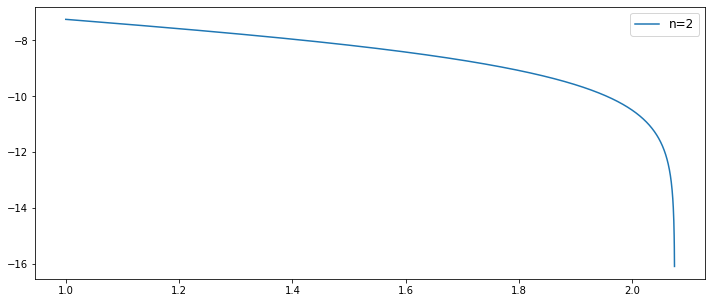

In [36]:
T = np.linspace(1, 4,10000)
K = 1/T
Z = Z1 + Z2 +Z3 +Z4

Z_1 = 0.5 * (2*np.sinh(2*K))**(4/2) * (Z1+Z2+Z3+Z4)
Z_2 = 0.5 * (2*np.sinh(2*K))**(16/2) * (Z1+Z2+Z3+Z4)
Z_3 = 0.5 * (2*np.sinh(2*K))**(64/2) * (Z1+Z2+Z3+Z4)
Z_4 = 0.5 * (2*np.sinh(2*K))**(256/2) * (Z1+Z2+Z3+Z4)
Z_5 = 0.5 * (2*np.sinh(2*K))**(1024/2) * (Z1+Z2+Z3+Z4)
Z_6 = 0.5 * (2*np.sinh(2*K))**(4096/2) * (Z1+Z2+Z3+Z4)

plt.figure(figsize=(12, 5))


pylab.plot(T, np.log(Z_1), label = 'n=2')
pylab.plot(T, np.log(Z_2), label = 'n=4')
pylab.plot(T, np.log(Z_3), label = 'n=8')
# pylab.plot(T, np.log(Z_4), label = 'n=16')
# pylab.plot(T, np.log(Z_5), label = 'n=32')
# # pylab.plot(T, np.log(Z_6), label = 'n=64')
pylab.legend(fontsize=12)

C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


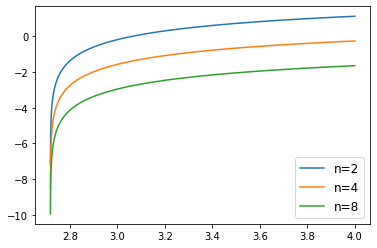

In [49]:
T = np.linspace(1, 4,10000)
K = 1/T

E = (-n*m)*(np.tanh(2*K))**(-1) - (dZ1_over_Z1 + dZ2_over_Z2 * Z2_over_Z1 + dZ3_over_Z3 * Z3_over_Z1 +dZ4_over_Z4 * Z4_over_Z1)/(1 +Z2_over_Z1 +Z3_over_Z1 +Z4_over_Z1)
E_mn = E /(m*n*T)

E_1 = E /(2*2*T)
E_2 = E /(4*4*T)
E_3 = E /(8*8*T)
E_4 = E /(16*16*T)
E_5 = E /(32*32*T)
E_6 = E /(64*64*T)



pylab.plot(T, np.log(E_1), label = 'n=2')
pylab.plot(T, np.log(E_2), label = 'n=4')
pylab.plot(T, np.log(E_3), label = 'n=8')
# pylab.plot(T, np.log(E_4), label = 'n=16')
# pylab.plot(T, np.log(E_5))
# pylab.plot(T, np.log(E_6))
pylab.legend(fontsize=12)

C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log
C:\Users\Interlink\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


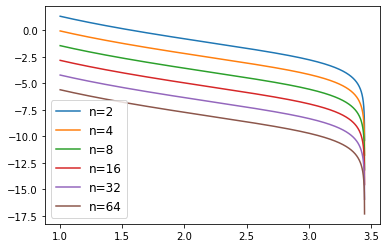

In [46]:
T = np.linspace(1, 10,10000)
K = 1/T

# C = (-2*(K**(2))) * (np.sinh(2*K)**(-2)) * (n*m) + K**(2) * 
#     ((ddZ1_over_Z1 + ddZ2_over_Z2 * Z2_over_Z1 + ddZ3_over_Z3 * Z3_over_Z1 +ddZ4_over_Z4 * Z4_over_Z1) 
#      / (1 +Z2_over_Z1 +Z3_over_Z1 +Z4_over_Z1) - ((dZ1_over_Z1 + dZ2_over_Z2 * Z2_over_Z1 + dZ3_over_Z3 * Z3_over_Z1 +dZ4_over_Z4 * Z4_over_Z1) / (1 +Z2_over_Z1 +Z3_over_Z1 +Z4_over_Z1))**(2))

C = (-2*(K**(2))) * (np.sinh(2*K)**(-2)) * (n*m) + K**(2) * ((ddZ1 + ddZ2 + ddZ3 +ddZ4) / (Z1 +Z2 +Z3 +Z4) -  ((dZ1 + dZ2 + dZ3 +dZ4) / (Z1 +Z2 +Z3 +Z4))**(2))

C_mn = C /(m*n*T)

C_1 = C /(2*2*T)
C_2 = C /(4*4*T)
C_3 = C /(8*8*T)
C_4 = C /(16*16*T)
C_5 = C /(32*32*T)
C_6 = C /(64*64*T)



pylab.plot(T, np.log(C_1), label = 'n=2')
pylab.plot(T, np.log(C_2), label = 'n=4')
pylab.plot(T, np.log(C_3), label = 'n=8')
pylab.plot(T, np.log(C_4), label = 'n=16')
pylab.plot(T, np.log(C_5), label = 'n=32')
pylab.plot(T, np.log(C_6), label = 'n=64')
pylab.legend(fontsize=12)